In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
from ecephys_analyses.data import paths
from ecephys.scoring import load_datetime_hypnogram
import ecephys.plot as eplt
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
subject="Valentino"
condition="sleep-deprivation-12h"

In [78]:
hypnogram_paths = paths.get_sglx_style_datapaths(subject=subject, condition=condition, ext="hypnogram.tsv")

In [79]:
hypnograms = [load_datetime_hypnogram(path) for path in hypnogram_paths]

In [80]:
hypnogram = pd.concat(hypnograms).reset_index(drop=True)

In [81]:
hypnogram

,state,start_time,end_time,duration
0,aWk,2020-02-20 09:07:26.000000000,2020-02-20 09:09:18.525599999,0 days 00:01:52.525599999
1,qWk,2020-02-20 09:09:18.525599999,2020-02-20 09:09:39.530400000,0 days 00:00:21.004800
2,aWk,2020-02-20 09:09:39.530400000,2020-02-20 09:11:34.181600000,0 days 00:01:54.651200
3,qWk,2020-02-20 09:11:34.181600000,2020-02-20 09:12:00.351889980,0 days 00:00:26.170289980
4,aWk,2020-02-20 09:12:00.351889980,2020-02-20 09:12:16.702002614,0 days 00:00:16.350112634
...,...,...,...,...
865,Wake,2020-02-20 21:01:55.990234375,2020-02-20 21:02:13.990234375,0 days 00:00:18
866,N1,2020-02-20 21:02:13.990234375,2020-02-20 21:02:43.990234375,0 days 00:00:30
867,N2,2020-02-20 21:02:43.990234375,2020-02-20 21:03:01.990234375,0 days 00:00:18
868,N1,2020-02-20 21:03:01.990234375,2020-02-20 21:04:07.990234375,0 days 00:01:06


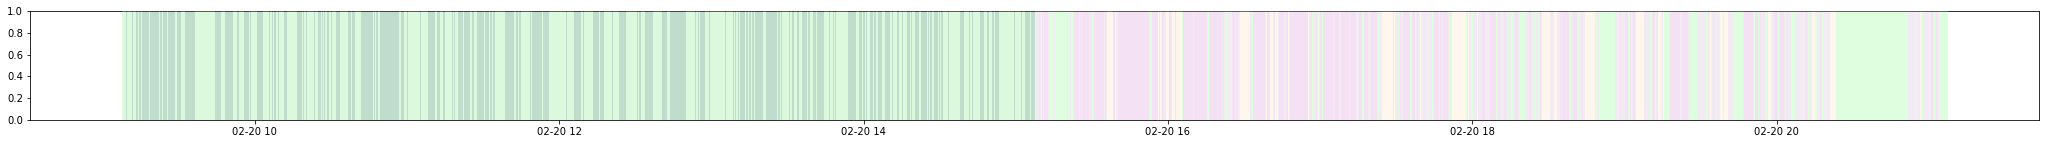

In [82]:
eplt.plot_hypnogram_overlay(hypnogram, figsize=(36, 2))

In [83]:
matches = hypnogram['state'].isin(['N1', 'N2', 'qWk']) & (hypnogram['duration'] > pd.Timedelta(45, 's'))

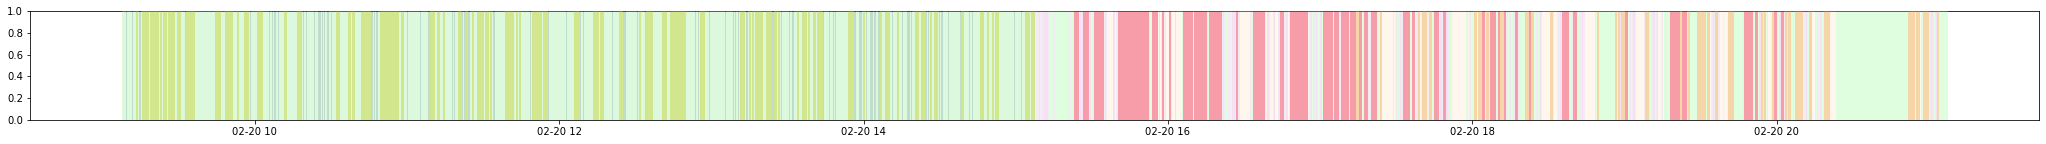

In [85]:
eplt.plot_hypnogram_overlay(hypnogram, figsize=(36, 2))
ax = plt.gca()
eplt.plot_hypnogram_overlay(hypnogram[matches], state_colors={'N1': 'orange', 'N2': 'red', 'qWk': 'yellow'}, ax=ax, figsize=(36, 2))

In [74]:
# Merge N1 and N2 into NREM